Loading dữ liệu đầu vào

In [12]:
import pandas as pd

# Load the datasets
final_data = pd.read_csv('final_data.csv')
ppi_data = pd.read_csv('previous_season_ppi.csv')
#
final_data = final_data.drop_duplicates(subset=['GAME_ID', 'SCORE_1', 'SCORE_2'], keep='first')
# Check the first few rows of each dataset
print(final_data.head())
print(ppi_data.head())


   Unnamed: 0   GAME_ID  SCOREMARGIN  TIME_REMAINING  PERIOD TEAM_1 TEAM_2  \
0           0  22400061            0               0       1    NYK    BOS   
2           2  22400061            3              12       1    NYK    BOS   
3           3  22400061            1              33       1    NYK    BOS   
6           6  22400061           -1              51       1    NYK    BOS   
7           7  22400061            1              66       1    NYK    BOS   

   PLAYER_1.1 PLAYER_1.2          PLAYER_1.3     PLAYER_1.4     PLAYER_1.5  \
0  OG Anunoby  Josh Hart  Karl-Anthony Towns  Mikal Bridges  Jalen Brunson   
2  OG Anunoby  Josh Hart  Karl-Anthony Towns  Mikal Bridges  Jalen Brunson   
3  OG Anunoby  Josh Hart  Karl-Anthony Towns  Mikal Bridges  Jalen Brunson   
6  OG Anunoby  Josh Hart  Karl-Anthony Towns  Mikal Bridges  Jalen Brunson   
7  OG Anunoby  Josh Hart  Karl-Anthony Towns  Mikal Bridges  Jalen Brunson   

     PLAYER_2.1    PLAYER_2.2  PLAYER_2.3     PLAYER_2.4    PL

Dùng Dictionary để map tên cầu thủ và rating

In [13]:
# Assuming 'Player Name' and 'Player Rating' are the relevant columns in ppi_data
player_rating_map = dict(zip(ppi_data['Player'], ppi_data['PPI']))


Thay thế các cột tên Player trong Final Data bằng PPI

In [14]:
# Identify player columns in final_data
player_columns = [col for col in final_data.columns if 'PLAYER' in col]

# Replace player names with ratings
for col in player_columns:
    final_data[col] = final_data[col].map(player_rating_map)


Thay thế những cột trống bằng rating thấp nhất

In [15]:
# Replace missing ratings with a default value, e.g., 0
final_data[player_columns] = final_data[player_columns].fillna(0.75)
final_data.head()

,Unnamed: 0,GAME_ID,SCOREMARGIN,TIME_REMAINING,PERIOD,TEAM_1,TEAM_2,PLAYER_1.1,PLAYER_1.2,PLAYER_1.3,PLAYER_1.4,PLAYER_1.5,PLAYER_2.1,PLAYER_2.2,PLAYER_2.3,PLAYER_2.4,PLAYER_2.5,SCORE_1,SCORE_2,WINNER
0,0,22400061,0,0,1,NYK,BOS,0.75,0.927545,1.542508,1.268391,1.720339,1.48597,1.761345,1.098134,1.288957,1.094207,0,0,BOS
2,2,22400061,3,12,1,NYK,BOS,0.75,0.927545,1.542508,1.268391,1.720339,1.48597,1.761345,1.098134,1.288957,1.094207,0,3,BOS
3,3,22400061,1,33,1,NYK,BOS,0.75,0.927545,1.542508,1.268391,1.720339,1.48597,1.761345,1.098134,1.288957,1.094207,2,3,BOS
6,6,22400061,-1,51,1,NYK,BOS,0.75,0.927545,1.542508,1.268391,1.720339,1.48597,1.761345,1.098134,1.288957,1.094207,4,3,BOS
7,7,22400061,1,66,1,NYK,BOS,0.75,0.927545,1.542508,1.268391,1.720339,1.48597,1.761345,1.098134,1.288957,1.094207,4,5,BOS


Thêm cột để kiểm tra đội 1 thắng hay thua

In [16]:
# Add a new column to indicate whether TEAM_1 is the winner
final_data['TEAM_1_WIN'] = (final_data['WINNER'] == final_data['TEAM_1']).astype(int)

Chuyển dữ liệu dạng Object sang String

In [17]:
# Change the data types of WINNER, TEAM_1, and TEAM_2 to string
columns_to_convert = ['WINNER', 'TEAM_1', 'TEAM_2']
final_data[columns_to_convert] = final_data[columns_to_convert].astype(str)
print(final_data.dtypes)

Unnamed: 0          int64
GAME_ID             int64
SCOREMARGIN         int64
TIME_REMAINING      int64
PERIOD              int64
TEAM_1             object
TEAM_2             object
PLAYER_1.1        float64
PLAYER_1.2        float64
PLAYER_1.3        float64
PLAYER_1.4        float64
PLAYER_1.5        float64
PLAYER_2.1        float64
PLAYER_2.2        float64
PLAYER_2.3        float64
PLAYER_2.4        float64
PLAYER_2.5        float64
SCORE_1             int64
SCORE_2             int64
WINNER             object
TEAM_1_WIN          int32
dtype: object


Sắp xếp cầu thủ theo rating

In [18]:
# Sort the player ratings for PLAYER_1 and PLAYER_2 in each row (from highest to lowest)
final_data[['PLAYER_1.1', 'PLAYER_1.2', 'PLAYER_1.3', 'PLAYER_1.4', 'PLAYER_1.5']] = final_data[['PLAYER_1.1', 'PLAYER_1.2', 'PLAYER_1.3', 'PLAYER_1.4', 'PLAYER_1.5']].apply(lambda x: pd.Series(sorted(x, reverse=True)), axis=1)
final_data[['PLAYER_2.1', 'PLAYER_2.2', 'PLAYER_2.3', 'PLAYER_2.4', 'PLAYER_2.5']] = final_data[['PLAYER_2.1', 'PLAYER_2.2', 'PLAYER_2.3', 'PLAYER_2.4', 'PLAYER_2.5']].apply(lambda x: pd.Series(sorted(x, reverse=True)), axis=1)

# Show the updated DataFrame
print(final_data.head())

   Unnamed: 0   GAME_ID  SCOREMARGIN  TIME_REMAINING  PERIOD TEAM_1 TEAM_2  \
0           0  22400061            0               0       1    NYK    BOS   
2           2  22400061            3              12       1    NYK    BOS   
3           3  22400061            1              33       1    NYK    BOS   
6           6  22400061           -1              51       1    NYK    BOS   
7           7  22400061            1              66       1    NYK    BOS   

   PLAYER_1.1  PLAYER_1.2  PLAYER_1.3  ...  PLAYER_1.5  PLAYER_2.1  \
0    1.720339    1.542508    1.268391  ...        0.75    1.761345   
2    1.720339    1.542508    1.268391  ...        0.75    1.761345   
3    1.720339    1.542508    1.268391  ...        0.75    1.761345   
6    1.720339    1.542508    1.268391  ...        0.75    1.761345   
7    1.720339    1.542508    1.268391  ...        0.75    1.761345   

   PLAYER_2.2  PLAYER_2.3  PLAYER_2.4  PLAYER_2.5  SCORE_1  SCORE_2  WINNER  \
0     1.48597    1.288957    1.

Thử nghiệm XGBoost

In [25]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Load and preprocess data
numerical_cols = ['SCOREMARGIN', 'TIME_REMAINING', 'PERIOD', 'PLAYER_1.1', 'PLAYER_1.2', 
                  'PLAYER_1.3', 'PLAYER_1.4', 'PLAYER_1.5', 'PLAYER_2.1', 'PLAYER_2.2', 
                  'PLAYER_2.3', 'PLAYER_2.4', 'PLAYER_2.5']  # Numerical feature names

categorical_cols = ["TEAM_1", "TEAM_2"]

# Scale numerical features
scaler = StandardScaler()
final_data[numerical_cols] = scaler.fit_transform(final_data[numerical_cols])

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),   # Scale numerical features
        ('cat', OneHotEncoder(), categorical_cols)    # One-hot encode categorical features
    ]
)

# Create a pipeline with preprocessing and model fitting
model = xgboost.XGBClassifier(objective="binary:logistic", eval_metric="auc", random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', model)  # Fit the XGBoost model
])

# Shuffle and split data
final_data = final_data.sample(frac=1, random_state=42).reset_index(drop=True)
X = final_data.drop(columns=["Unnamed: 0", "GAME_ID", "WINNER", "TEAM_1_WIN"])  # Drop non-predictive columns
y = final_data["TEAM_1_WIN"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 2000, 100),
    'learning_rate': [0.0001, 0.001, 0.01, 0.05, 0.5],
    'max_depth': [3, 6, 10, 20],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 1, 10],  # Add regularization options
    'reg_lambda': [0, 1, 10]
}

# Initialize XGBoost model
model = xgboost.XGBClassifier(objective="binary:logistic", eval_metric="auc", random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1,
    n_iter=50,
    random_state=42
)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)
print("Best Score (CV):", random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 1100, 'max_depth': 10, 'learning_rate': 0.5, 'colsample_bytree': 0.8}
Best Score (CV): 0.9978456178951228


Gridsearch Parameter từ kết quả của random search

In [20]:
from sklearn.model_selection import GridSearchCV
#Chạy randomsearch 
param_grid = {
    'learning_rate': [0.001, 0.1, 0.5],
    'max_depth': [1, 6, 10],
    'n_estimators': [1, 1100, 1600, 700]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 1600}


Chạy model XGBoost

In [26]:

# Set the best parameters for the final model
final_model = xgboost.XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",  # Specify eval_metric here
    random_state=42,
    subsample=1.0,
    reg_lambda=1,
    reg_alpha=0,
    n_estimators=1600,
    max_depth=6,
    learning_rate=0.5,
    colsample_bytree=0.8,  # Fixed typo
    enable_categorical=False,  # Since we are using OneHotEncoder, no need for enable_categorical
)

# Train the final model with early stopping
final_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # Use validation set for early stopping
    verbose=True
)

# Predictions
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Final Accuracy: {accuracy:.5f}")
print(f"Final AUC Score: {auc_score:.5f}")


[0]	validation_0-auc:0.83599
[1]	validation_0-auc:0.92076
[2]	validation_0-auc:0.97589
[3]	validation_0-auc:0.98537
[4]	validation_0-auc:0.98911
[5]	validation_0-auc:0.99188
[6]	validation_0-auc:0.99236
[7]	validation_0-auc:0.99271
[8]	validation_0-auc:0.99479
[9]	validation_0-auc:0.99619
[10]	validation_0-auc:0.99847
[11]	validation_0-auc:0.99875
[12]	validation_0-auc:0.99891
[13]	validation_0-auc:0.99914
[14]	validation_0-auc:0.99948
[15]	validation_0-auc:0.99956
[16]	validation_0-auc:0.99961
[17]	validation_0-auc:0.99979
[18]	validation_0-auc:0.99982
[19]	validation_0-auc:0.99991
[20]	validation_0-auc:0.99992
[21]	validation_0-auc:0.99994
[22]	validation_0-auc:0.99994
[23]	validation_0-auc:0.99995
[24]	validation_0-auc:0.99995
[25]	validation_0-auc:0.99996
[26]	validation_0-auc:0.99996
[27]	validation_0-auc:0.99996
[28]	validation_0-auc:0.99997
[29]	validation_0-auc:0.99997
[30]	validation_0-auc:0.99997
[31]	validation_0-auc:0.99997
[32]	validation_0-auc:0.99998
[33]	validation_0-au

Feature Importance

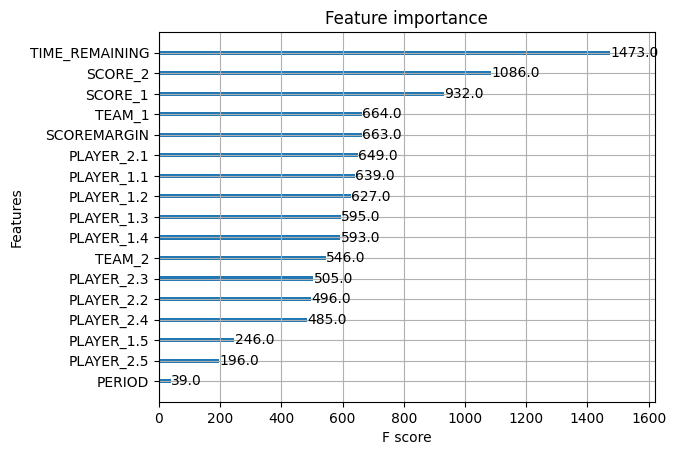

In [27]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(final_model)
plt.show()
